In [7]:
import sys
import os

# Go up one directory from the notebook location
sys.path.append(os.path.abspath(".."))

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
dataset = pd.read_csv("../data/load_data.csv", parse_dates=['TIMESTAMP'])

In [10]:
dataset = dataset.set_index('TIMESTAMP')
dataset = dataset.sort_index()

In [11]:
first_date, last_date = dataset.index[0], dataset.index[-1]
first_date, last_date

(Timestamp('2005-01-02 00:00:00'), Timestamp('2011-12-09 23:00:00'))

In [12]:
len(set(dataset.index.date))

2407

<Axes: title={'center': 'Daily Average LOAD'}, xlabel='Time', ylabel='Load'>

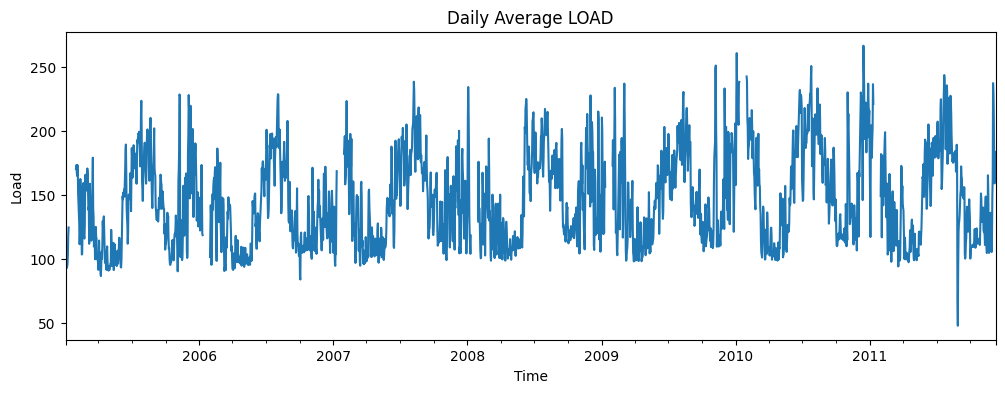

In [13]:
dataset.resample("D")["LOAD"].mean().plot(figsize=(12,4), title="Daily Average LOAD", xlabel="Time", ylabel="Load")


<Axes: title={'center': 'Daily Average Temperature'}, xlabel='Time', ylabel='Temperature'>

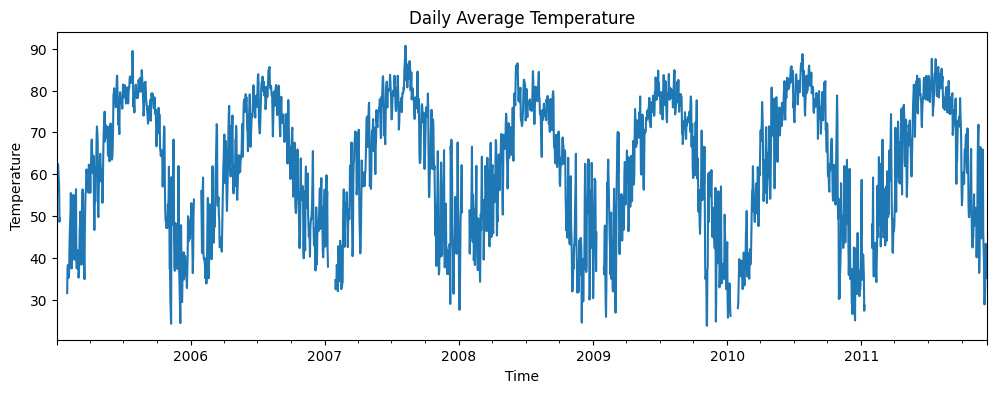

In [14]:
dataset.resample("D")["w1"].mean().plot(figsize=(12,4), title="Daily Average Temperature", xlabel="Time", ylabel="Temperature")

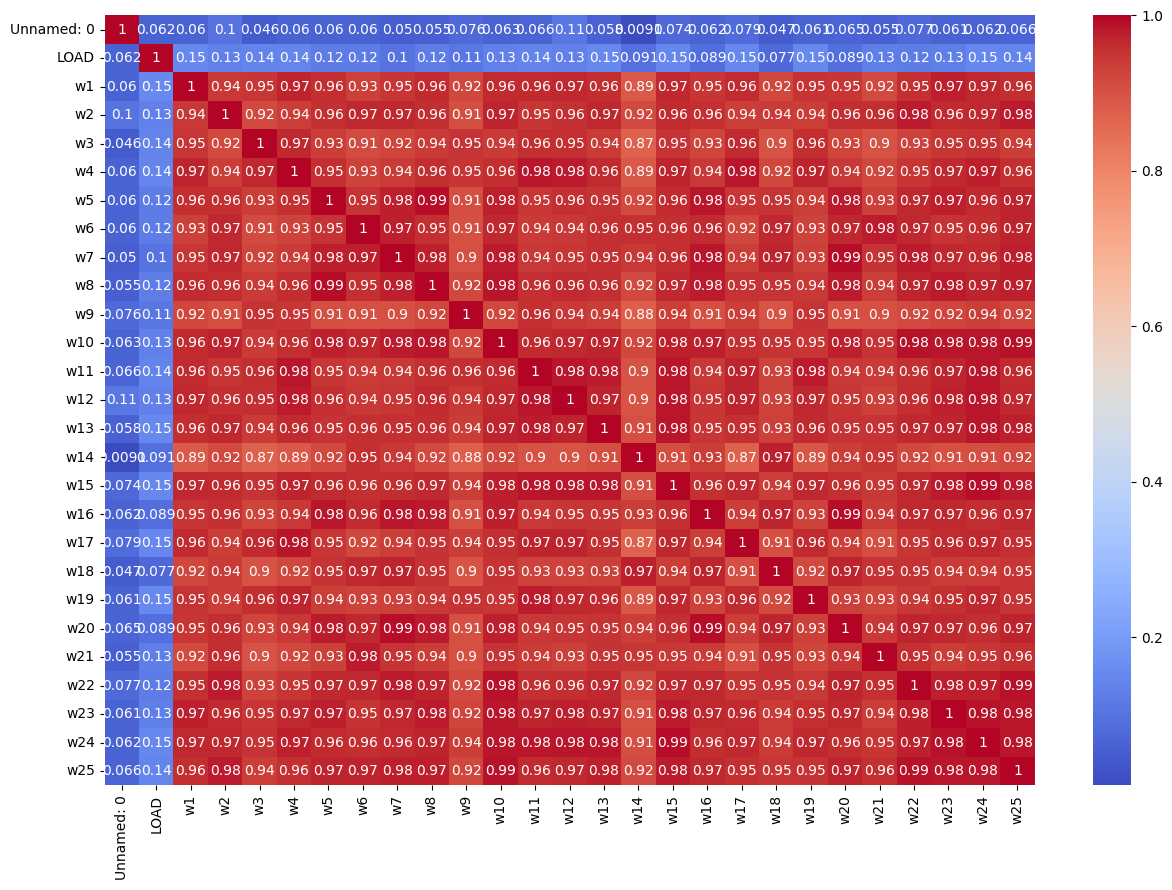

In [15]:
correleations = dataset.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correleations, annot=True, cmap="coolwarm")
plt.show()

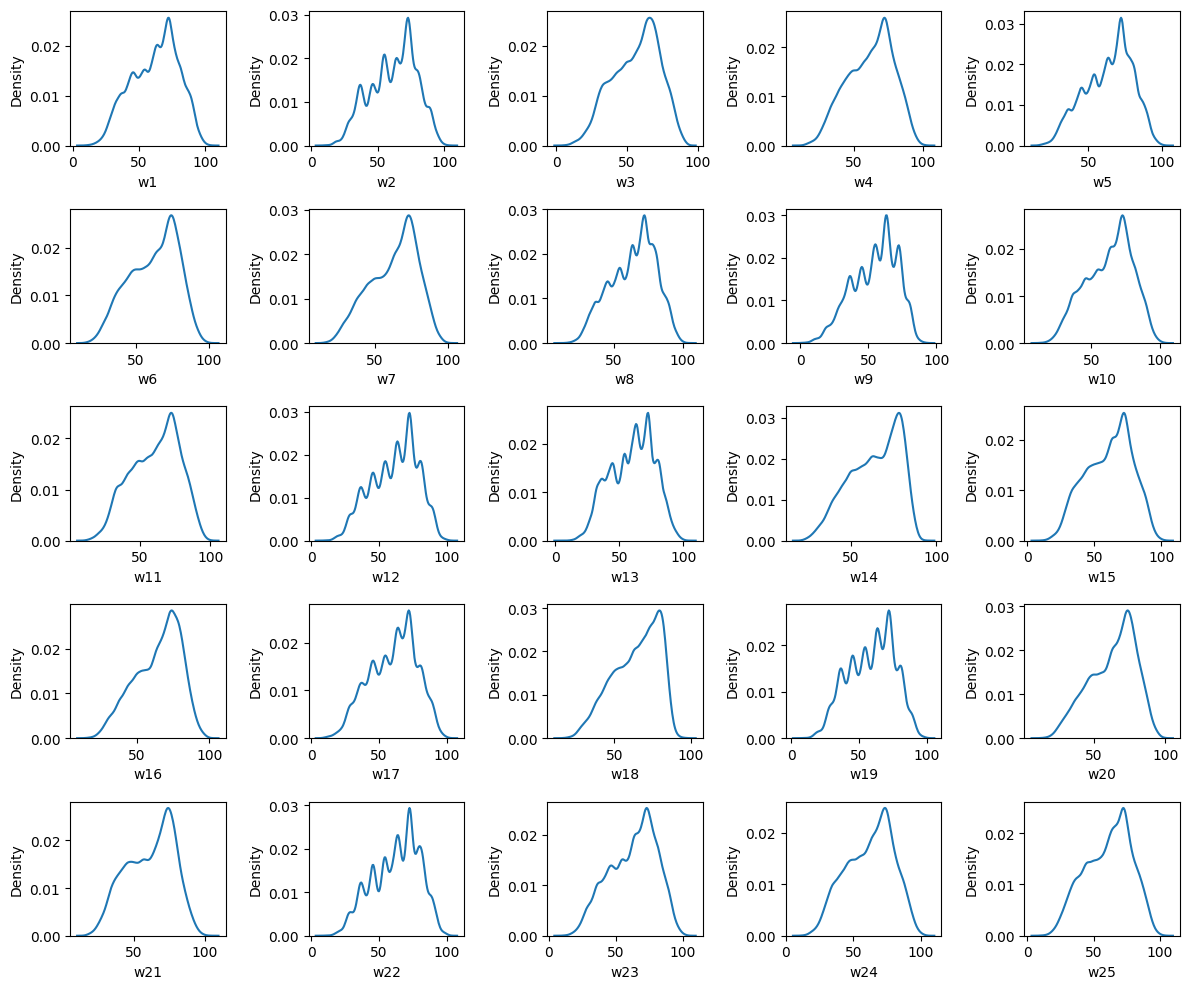

In [16]:
features = ['w' + str(i) for i in range(1, 26)]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(12,10))

axes = axes.flatten()

for ax, feature in zip(axes, features):
    sns.kdeplot(data=dataset, x=feature, ax=ax)

plt.tight_layout()
plt.show()

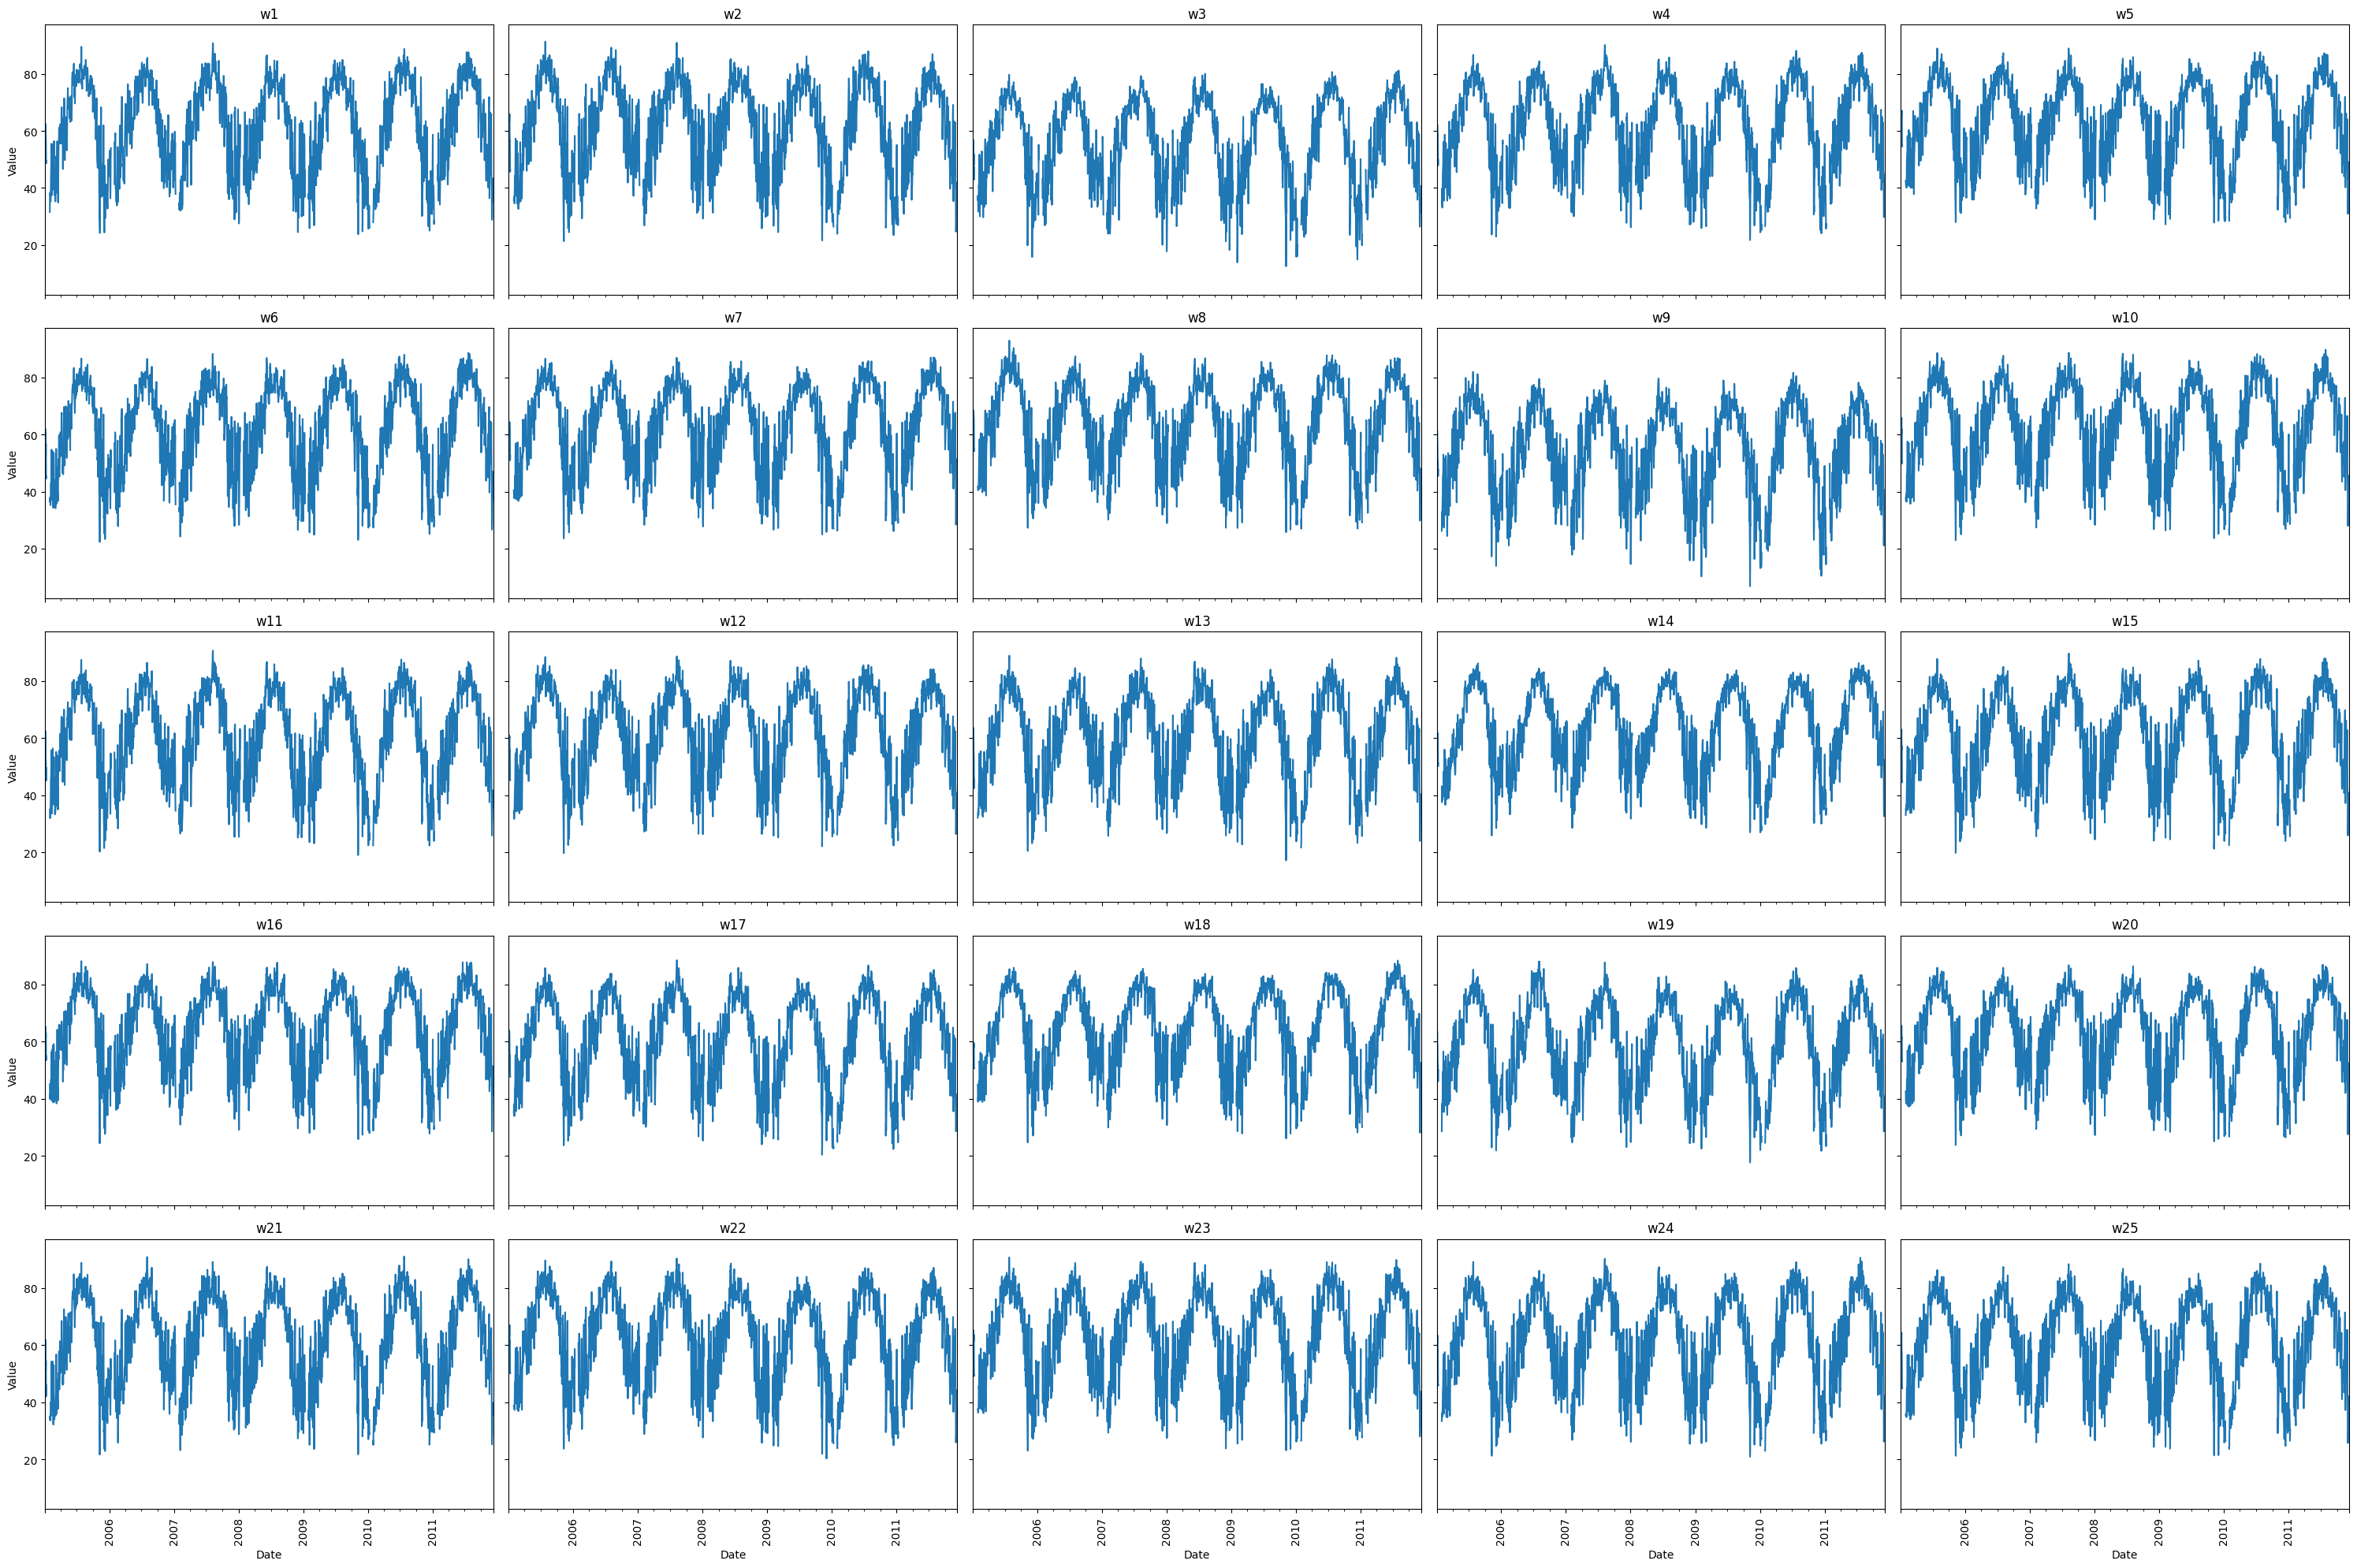

In [17]:
import matplotlib.pyplot as plt

# List of feature names
features = ['w' + str(i) for i in range(1, 26)]

# Create 5x5 subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(30, 20), sharex=True, sharey=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop over features and axes
for ax, feature in zip(axes, features):
    dataset.resample("D")[feature].mean().plot(ax=ax)
    ax.set_title(feature)
    ax.tick_params(axis="x", rotation=90)  # rotate x-axis labels
    ax.set_xlabel("Date")
    ax.set_ylabel("Value")

plt.tight_layout()
plt.show()


<Axes: xlabel='w1', ylabel='LOAD'>

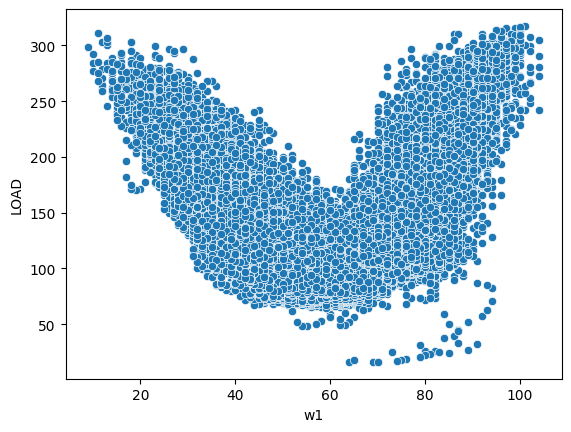

In [18]:
sns.scatterplot(data=dataset, x="w1", y="LOAD")